In [17]:
#[0, 574, 961, 1661, 1890] at snapshot 135 (z = 0)

#[13, 42, 0, 63, 51] at snapshot 54 (z = 4.01) 

In [40]:
import vaex
import illustris_python as il
import numpy as np
import matplotlib as mpl
import shared
import matplotlib.pyplot as plt

In [41]:
def get_coordinates_for_particleIDs(data, particle_ids):
    coordinates = data['Coordinates']
    ids = data['ParticleIDs']
    
    id_to_index = {particle_id: index for index, particle_id in enumerate(ids)}
    particle_indices = [id_to_index.get(particle_id) for particle_id in particle_ids]
    valid_indices = [index for index in particle_indices if index is not None]
    
    if len(valid_indices) != len(particle_indices):
        print("Warning: Some particle IDs were not found.")
    
    return coordinates[valid_indices]

In [42]:
base_path = "/Users/users/nastase/PROJECT/"

In [43]:
def get_snapshot_cluster_coordinates(base_snapshot_id: int, subhalo_id: int, test_snapshot_ids: list[int]):
    """
    Params:
    `snapshot_id`: ID of the reference snapshot
    `subhalo_id`: ID of the subhalo. This is dependent on the `snapshot_id`
    `snapshot_ids`: List of IDs

    Returns:
    `test_coordinates`: Dict where the key is the `snapshot_id` and the value is the coordinates for the cluster in that snapshot

    ## Example
    ```python
    # Compute coordinates
    coordinates = get_snapshot_cluster_coordinates(base_snapshot_id=54, subhalo_id=13, test_snapshot_ids=[60])

    # Generate graph
    fig, ax = plt.subplots()

    ax.scatter(coordinates[54][:,0], coordinates[54][:,1], c='blue', alpha=0.03, label='z = 54')
    ax.scatter(coordinates[60][:,0], coordinates[60][:,1], c='red', alpha=0.03, label='z = 60')

    plt.xlabel('x [ckpc/h]')
    plt.ylabel('y [ckpc/h]')
    plt.legend()
    ```
    """

    subhalo = il.snapshot.loadSubhalo(base_path, base_snapshot_id, subhalo_id, 'DM')
    subhalo_particle_ids = subhalo['ParticleIDs']
    subhalo_coordinates = subhalo['Coordinates']

    test_coordinates = {}

    test_coordinates[base_snapshot_id] = subhalo_coordinates

    for test_snapshot_id in test_snapshot_ids:
      coords_ids = il.snapshot.loadSubset(base_path, test_snapshot_id, 'dm', ['Coordinates', 'ParticleIDs'])
      coordinates = get_coordinates_for_particleIDs(coords_ids, subhalo_particle_ids)
      test_coordinates[test_snapshot_id] = coordinates

    return test_coordinates

In [44]:
subhaloes_54 = il.snapshot.loadSubhalo(base_path, 54, 13, 'DM')
part_IDs = subhaloes_54['ParticleIDs']
coordinates_54 = subhaloes_54['Coordinates']
coords_IDs_56 = il.snapshot.loadSubset(base_path, 56,'dm', ['Coordinates', 'ParticleIDs'])
coords_IDs_58 = il.snapshot.loadSubset(base_path, 58, 'dm', ['Coordinates', 'ParticleIDs'])
coords_IDs_60 = il.snapshot.loadSubset(base_path, 60, 'dm', ['Coordinates', 'ParticleIDs'])

In [20]:
coordinates_56 = get_coordinates_for_particleIDs(coords_IDs_56, part_IDs)

In [21]:
coordinates_58 = get_coordinates_for_particleIDs(coords_IDs_58, part_IDs)

In [22]:
coordinates_60 = get_coordinates_for_particleIDs(coords_IDs_60, part_IDs)

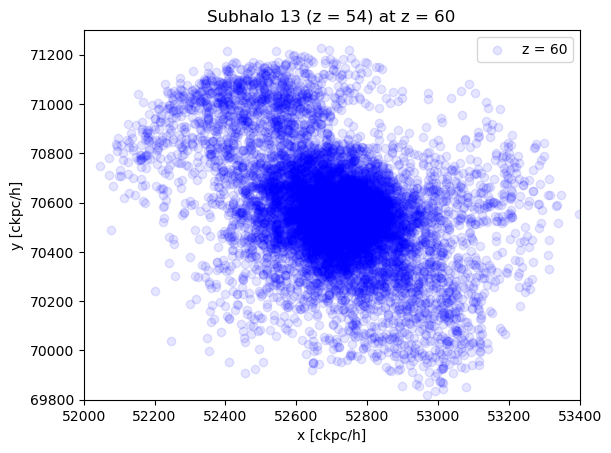

In [60]:
fig, ax = plt.subplots()

# ax.scatter(coordinates_54[:,0], coordinates_54[:,1], c='blue', alpha=0.1, label='z = 54')
# ax.scatter(coordinates_56[:,0], coordinates_56[:,1], c='blue', alpha=0.1, label='z = 56')
# ax.scatter(coordinates_58[:,0], coordinates_58[:,1], c='blue', alpha=0.1, label='z = 58')
ax.scatter(coordinates_60[:,0], coordinates_60[:,1], c='blue', alpha=0.1, label='z = 60')
plt.title('Subhalo 13 (z = 54) at z = 60')
plt.xlabel('x [ckpc/h]')
plt.ylabel('y [ckpc/h]')
plt.xlim([52000,53400])
plt.ylim([69800,71300])

plt.legend()

plt.savefig('Data/W2_mass_movements/13_54_60.png')

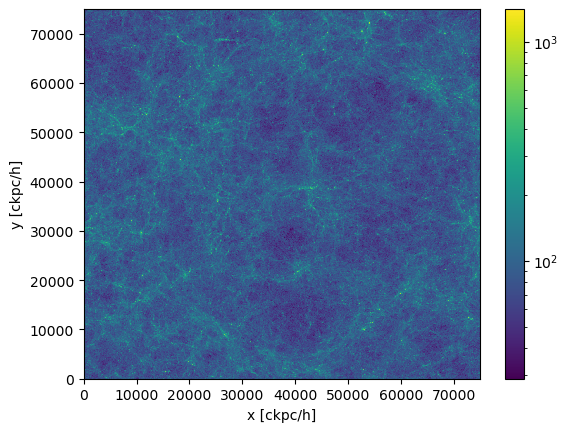

In [15]:
dm_pos = il.snapshot.loadSubset(base_path,54,'dm',['Coordinates'])
plt.hist2d(dm_pos[:,0], dm_pos[:,1], norm=mpl.colors.LogNorm(), bins=1024)
plt.xlim([0,75000])
plt.ylim([0,75000])
plt.xlabel('x [ckpc/h]')
plt.ylabel('y [ckpc/h]')
plt.colorbar()

In [45]:
coordinates = get_snapshot_cluster_coordinates(base_snapshot_id=54, subhalo_id=51, test_snapshot_ids=[60])

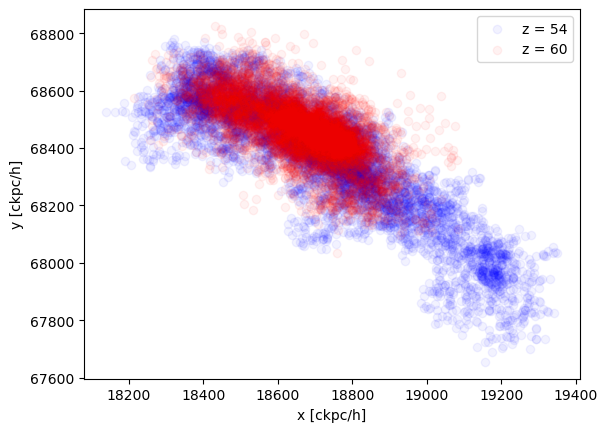

In [48]:
fig, ax = plt.subplots()

ax.scatter(coordinates[54][:,0], coordinates[54][:,1], c='blue', alpha=0.05, label='z = 54')
ax.scatter(coordinates[60][:,0], coordinates[60][:,1], c='red', alpha=0.05, label='z = 60')

plt.xlabel('x [ckpc/h]')
plt.ylabel('y [ckpc/h]')
plt.legend()

In [ ]:
plt.hist2d(coodrinates[:,0], coordinates[:,1], norm=mpl.colors.LogNorm(), bins=1024)